# ChargeFW2 Python bindings

This tutorial shows how to use the Python bindings to the ChargeFW2 application, the computation core of Atomic Charge Calculator II (https://acc2.ncbr.muni.cz/).

## Installation

The ChargeFW2 is a C++ application which must be compiled and installed first. See the README: https://github.com/krab1k/ChargeFW2

To use the Python module, it might be necessary to point Python interpreter to the correct library's location. This can be done by setting a PYTHONPATH environment variable. Assuming we installed ChargeFW2 into the directory `/opt/chargefw2`, we set:

```bash
export PYTHONPATH=/opt/chargefw2/lib
```

Now we are ready to run Python and use the ChargeFW2 module.

## Usage

First, we import the Python module:

In [1]:
import chargefw2_python

### Loading the molecules

Then we load the molecules. Supported formats are: SDF, PDB, mmCIF and Mol2.

In [2]:
molecules = chargefw2_python.Molecules('molecules.sdf')

Let's see how many molecules we have loaded:

In [3]:
len(molecules)

47

### Available methods and parameters

ChargeFW2 provides implementation of multiple charge calculation methods. The full list can be obtained by:

In [4]:
chargefw2_python.get_available_methods()

['eem',
 'abeem',
 'sfkeem',
 'qeq',
 'smpqeq',
 'eqeq',
 'eqeqc',
 'delre',
 'peoe',
 'mpeoe',
 'gdac',
 'sqe',
 'sqeq0',
 'sqeqp',
 'mgc',
 'kcm',
 'denr',
 'tsef',
 'charge2',
 'veem',
 'formal']

All methods are described in the documentation: https://acc2.ncbr.muni.cz/static/methods.pdf

Some methods require parameters to be set for calculation. To see the list of parameters available for a given method, use:

In [5]:
chargefw2_python.get_available_parameters('gdac')

['GDAC_00_original']

However, not all methods and parameters can be used for every set of molecules. Applicable combinations can be listed by using the `get_suitable_methods` function. The empty parameter list `[]` denotes that the method does not use parameters:

In [6]:
chargefw2_python.get_suitable_methods(molecules)

{'denr': ['DENR_00_from_QEq'],
 'eem': ['EEM_00_NEEMP_ccd2016_npa',
  'EEM_00_NEEMP_ccd2016_npa2',
  'EEM_05_NEEMP_ccd2016_mpa',
  'EEM_05_NEEMP_ccd2016_mpa2',
  'EEM_10_Cheminf_b3lyp_aim',
  'EEM_10_Cheminf_b3lyp_mpa',
  'EEM_10_Cheminf_b3lyp_npa',
  'EEM_10_Cheminf_hf_aim',
  'EEM_10_Cheminf_hf_mpa',
  'EEM_10_Cheminf_hf_npa'],
 'eqeq': [],
 'formal': [],
 'mgc': [],
 'qeq': ['QEq_00_original'],
 'sqe': ['SQE_10_Schindler2021_CCD_gen'],
 'sqeq0': ['SQEq0_10_Schindler2021_CCD_gen'],
 'sqeqp': ['SQEqp_10_Schindler2021_CCD_gen'],
 'tsef': ['TSEF_00_from_QEq'],
 'veem': []}

### Calculating charges

Now, we are ready to calculate the charges. To do this, we use the `calculate_charges` function. It requires set of molecules and a method name with optional parameters name:

In [7]:
help(chargefw2_python.calculate_charges)

Help on built-in function calculate_charges in module chargefw2_python:

calculate_charges(...) method of builtins.PyCapsule instance
    calculate_charges(molecules: chargefw2_python.Molecules, method_name: str, parameters_name: Optional[str] = None) -> Dict[str, List[float]]
    
    Calculate partial atomic charges for a given molecules and method



First, we use EEM with a particular parameter set:

In [8]:
charges_eem = chargefw2_python.calculate_charges(molecules, 'eem', 'EEM_00_NEEMP_ccd2016_npa')

Second, we can try another method, e.g., SQE+qp: 

In [9]:
charges_sqeqp = chargefw2_python.calculate_charges(molecules, 'sqeqp', 'SQEqp_10_Schindler2021_CCD_gen')

The type of the results is a dictionary, the keys are the names of the molecules taken from the input file, the values are the list of charges (doubles):

In [10]:
next(iter(charges_sqeqp))

'NSC_100000'

In [11]:
charges_sqeqp['NSC_100000']

[-0.4013101729679656,
 -0.49561754801827274,
 -0.5320169779840944,
 -0.19271326471408062,
 -0.1817703053559501,
 -0.17908407030152673,
 -0.1860744560889507,
 -0.20711936087690033,
 -0.028827174054946197,
 -0.22546219919455632,
 -0.15770951799946326,
 0.16633318542675285,
 -0.08248127574078125,
 -0.18100334661131906,
 -0.16626188101220596,
 0.39553675066291183,
 0.5663927957687999,
 -0.17843021301267617,
 0.20252704483948406,
 0.2036824880561163,
 0.20211436774927077,
 0.20923268026389175,
 0.20102006067141362,
 0.21035760217244373,
 0.20756160194174492,
 0.20826824565813132,
 0.21465115897924564,
 0.21343042546931648,
 0.1947733562741633]

### (Optional) Plotting the charges

Finally, we can create a simple correlation plot to visually compare the calculated charges:

In [12]:
import matplotlib.pyplot as plt

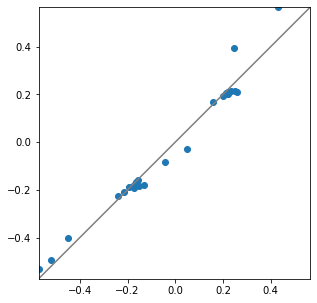

In [13]:
xs = charges_eem['NSC_100000']
ys = charges_sqeqp['NSC_100000']
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
low = min(xs + ys)
high = max(xs + ys)
ax.set_xlim(low, high)
ax.set_ylim(low, high)
ax.set_aspect('equal')
ax.plot([low, high], [low, high], c='grey')
ax.scatter(xs, ys)